In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from imp import reload

from cca import methods_comparison
from cca import synth_data

# GPFA

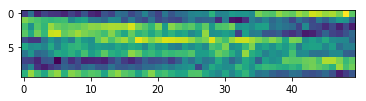

log likelihood: -732640.7935781366
-931.9301800530338
270.55909684211247
-932.0522984222557
-932.7593679164338
-932.7673327165917
-932.7682484041989
-932.768250316642
log likelihood: -955435.5298866971
-926.7427116357372
1567.6469056050305
-926.9106795120317
-927.3060886199858
-927.3119017517824
-927.3119584215267
-927.3119584374873
log likelihood: -736132.5613698069
-936.4656109973341
253.4880370908479
-936.5121553587467
-936.7434203615321
-936.7435930416921
-936.7436102580082
-936.7436102673739
log likelihood: -755633.1108814639
-932.037372681614
1642.3631239364627
-932.0780686049025
-932.1980339169912
-932.1986873891751
-932.1986902525758
-932.1986902526755
log likelihood: -733378.1051867467
-940.0010569816411
203.1812537872504
-940.0103799994347
-940.0463703976121
-940.0465017271003
-940.046502356829
log likelihood: -751611.9400335622
-935.8276884828214
2979.8612615263746
-935.8502750982971
-935.8849497105787
-935.8850341141336
-935.8850342985747
log likelihood: -733313.7474266895


log likelihood: -744757.499406709
-958.7793722868664
3133.5952265673973
-958.7828339285006
-958.7914889244762
-958.7914973338102
-958.7914973580095
log likelihood: -739867.9622669275
-959.8642874490943
3357.682770343413
-959.8155124126363
-959.8664916635652
-959.866497793493
-959.8664980517657
log likelihood: -744756.0596303659
-959.4158552939534
3114.980610139648
-959.4194318493977
-959.4275618810861
-959.4275696187467
-959.4275696437985
log likelihood: -740098.7807504286
-960.4407593634152
3362.952638274032
-960.3681178778395
-960.4430162794808
-960.4430226517347
-960.4430229371417
log likelihood: -744758.9427359906
-960.0427677008313
3097.6157523742204
-960.0465039090218
-960.0540773862999
-960.0540844477273
-960.0540844735459
log likelihood: -740327.1731770263
-961.0109341341849
3364.8909422382026
-960.9034826943046
-961.0132453126948
-961.0132520512011
-961.0132523639716
log likelihood: -744765.8452930544
-960.66035000287
3081.5157608357604
-960.6643003805219
-960.6712753523307
-9

In [5]:
reload(methods_comparison)

gpfa = methods_comparison.GaussianProcessFactorAnalysis(n_factors=3, verbose=True)

N = 10
noise_cov = np.eye(N) * .1
X = synth_data.gen_chaotic_rnn(N, 10, 0.001, 0.01, noise_cov=noise_cov)
X = X[100:300, :]

plt.imshow(X[:50, :].T)
plt.show()

gpfa.fit(X)

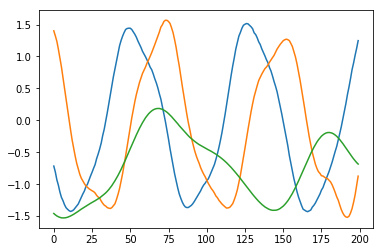

In [6]:
for x in gpfa.transform(X).T:
    plt.plot(x)
plt.show()

# SFA

In [16]:
t = np.linspace(0, 200, 10000)
x = np.stack([np.sin(.25 * t), np.cos(t)]).T
y = x.dot(stats.ortho_group.rvs(4)[:2])
y += np.random.randn(*y.shape) / 4.
y -= y.mean(axis=0, keepdims=True)

In [17]:
y.shape

(10000, 4)

In [18]:
u, s, vh = np.linalg.svd(y)
whiten = vh.T.dot(np.diag(1./s))
yw = y.dot(whiten)
yp = np.diff(yw, axis=0)

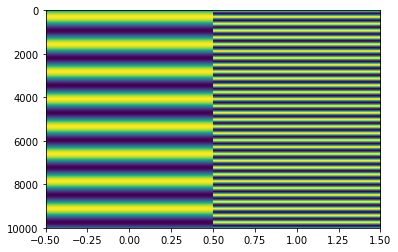

In [19]:
plt.imshow(x, aspect='auto')
plt.show()

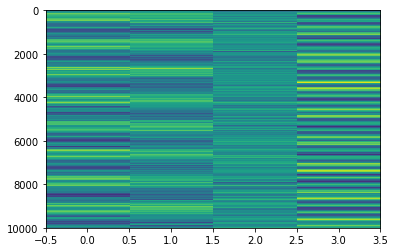

In [20]:
plt.imshow(y, aspect='auto')
plt.show()

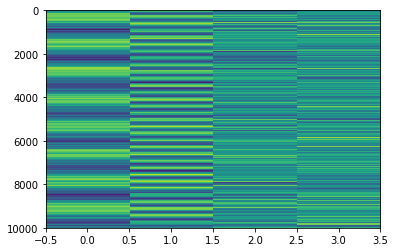

In [21]:
plt.imshow(yw, aspect='auto')
plt.show()

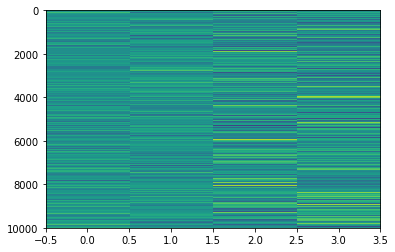

In [22]:
plt.imshow(yp, aspect='auto')
plt.show()

In [23]:
u, s, vh = np.linalg.svd(yp, full_matrices=False)
proj = vh.T

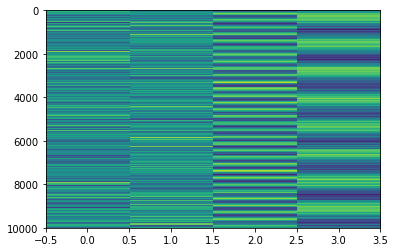

In [24]:
y_proj = y.dot(whiten.dot(proj))
plt.imshow(y_proj, aspect='auto')
plt.show()

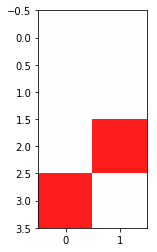

In [25]:
y_norm = y_proj - y_proj.mean(axis=0, keepdims=True)
y_norm /= np.linalg.norm(y_norm, axis=0, keepdims=True)
x_norm = x - x.mean(axis=0, keepdims=True)
x_norm /= np.linalg.norm(x_norm, axis=0, keepdims=True)
corr = y_norm.T.dot(x_norm)**2
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [26]:
corr

array([[5.75398152e-06, 2.13227528e-06],
       [2.00287795e-04, 1.32421380e-09],
       [2.06794498e-03, 8.85016755e-01],
       [8.87349791e-01, 2.17762144e-03]])

In [27]:
SFA = methods_comparison.SlowFeatureAnalysis(2)

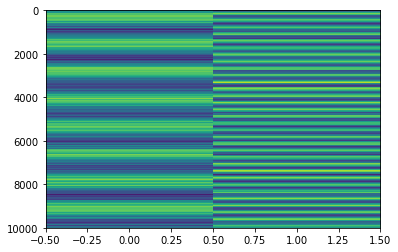

In [28]:
y_est = SFA.fit_transform(y)
plt.imshow(y_est, aspect='auto')
plt.show()

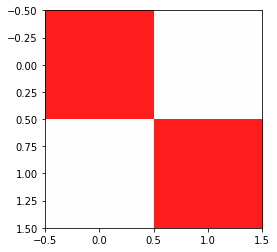

In [29]:
y_norm = y_est - y_est.mean(axis=0, keepdims=True)
y_norm /= np.linalg.norm(y_norm, axis=0, keepdims=True)
corr = y_norm.T.dot(x_norm)**2
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [30]:
corr

array([[0.88734979, 0.00217762],
       [0.00206794, 0.88501675]])